<a href="https://colab.research.google.com/github/Saral0603/Fake_News_Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fake News Data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Data:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t..

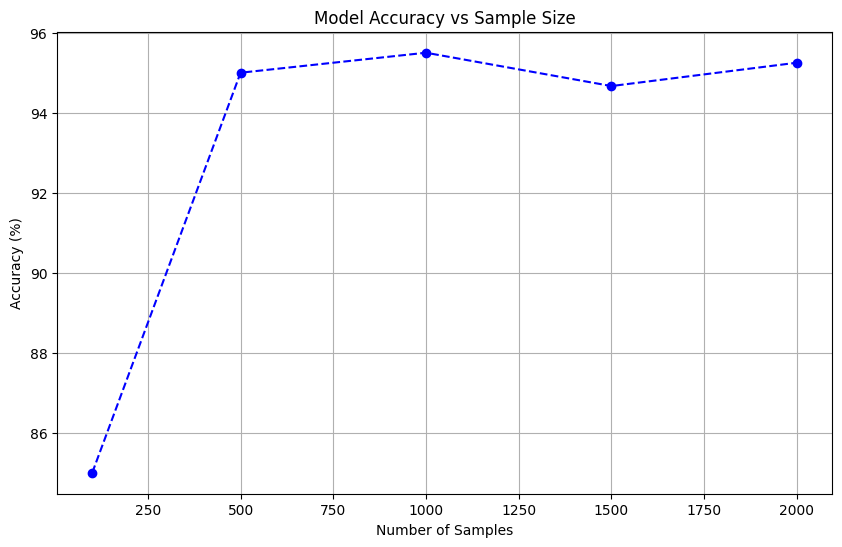


Upload the new dataset for classification:


Saving valid.csv to valid.csv

New dataset with predictions:
                                           Statement  predicted_label
0                         less americans working 70s                1
1  obama sworn office use holy bible instead kura...                1
2  says organizations parading social welfare org...                1
3             says nearly half oregons children poor                1
4  attacks republicans various programs economic ...                1

Number of predictions: 2571


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')

fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

print("Fake News Data:")
print(fake_news.head())

print("\nTrue News Data:")
print(true_news.head())

fake_news['label'] = 1
true_news['label'] = 0

news_data = pd.concat([fake_news, true_news], ignore_index=True)

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

news_data['text'] = news_data['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(news_data['text'])
y = news_data['label']

sample_sizes = [100, 500, 1000, 1500, 2000]
accuracies = []

for size in sample_sizes:
    print(f"\nTraining on {size} samples...")
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42, stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy with {size} samples: {accuracy * 100:.2f}%')

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, [acc * 100 for acc in accuracies], marker='o', linestyle='--', color='b')
plt.title('Model Accuracy vs Sample Size')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

print("\nUpload the new dataset for classification:")
uploaded_new = files.upload()

new_news = pd.read_csv('valid.csv')
new_news['Statement'] = new_news['Statement'].apply(preprocess_text)
X_new = vectorizer.transform(new_news['Statement'])
new_predictions = model.predict(X_new)
new_news['predicted_label'] = new_predictions

print("\nNew dataset with predictions:")
print(new_news[['Statement', 'predicted_label']].head())

print("\nNumber of predictions:", len(new_predictions))
